In [ ]:
# default_exp module10

# Import

In [ ]:
# export
import numpy as np
import matplotlib.pyplot as plt

from cs371.utils import *

# String Edit Distance


* Add a character to s1 - costs 1
* Delete a character from s1 - costs 1
* Swap a character in s1 - costs 1
    

In [ ]:
# export
def sed_slow(s1, s2):
    if   len(s1) == 0: return len(s2) # Just add characters to s1 to match s2
    elif len(s2) == 0: return len(s1) # Just add characters to s2 to match s1
    else:                             # Both strings are non-empty
        return min([
            sed_slow(s1[:-1], s2) + 1,                          # Delete char from s1
            sed_slow(s1, s2[:-1]) + 1,                          # Delete char from s2
            sed_slow(s1[:-1], s2[:-1]) + int(s1[-1] != s2[-1]), # Char either matches or is swapped
        ])

In [ ]:
sed_slow('chris', 'chase')

3

In [ ]:
sed_slow('school', 'fools')

4

In [ ]:
sed_slow('asdasdasf', 'fgdfgdfgds')

8

more than 1 second

In [ ]:
# export
def sed_fast(s1, s2, memory={}):
    if frozenset([s1, s2]) in memory: return memory[frozenset([s1, s2])]
    
    cost = None
    if   len(s1) == 0: cost = len(s2) # Just add characters to s1 to match s2
    elif len(s2) == 0: cost = len(s1) # Just add characters to s2 to match s1
    else:                             # Both strings are non-empty
        cost = min([
            sed_fast(s1[:-1], s2, memory) + 1,                          # Delete char from s1
            sed_fast(s1, s2[:-1], memory) + 1,                          # Delete char from s2
            sed_fast(s1[:-1], s2[:-1], memory) + int(s1[-1] != s2[-1]), # Char either matches or is swapped
        ])

    memory[frozenset([s1, s2])] = cost
    return cost

In [ ]:
sed_fast('chris', 'chase')

3

In [ ]:
sed_fast('school', 'fools')

4

In [ ]:
sed_fast('asdasdasf', 'fgdfgdfgds')

8

few ms, much faster

Use table based dynamic programming approach

In [ ]:
def sed_faster(s1, s2):
    arr_dp = np.zeros((len(s1)+1, len(s2)+1), dtype=np.int_)
    arr_dp[:,0] = np.arange(len(s1)+1)
    arr_dp[0,:] = np.arange(len(s2)+1)
    for i in range(1, len(s1)+1):
        for j in range(1, len(s2)+1):
            c1 = arr_dp[i-1, j] + 1
            c2 = arr_dp[i, j-1] + 1
            c3 = arr_dp[i-1, j-1] + int(s1[i-1] != s2[j-1])
            arr_dp[i, j] = min(c1, c2, c3)
    return arr_dp[-1, -1]

In [ ]:
sed_faster('chris', 'chase')

3

In [ ]:
sed_faster('school', 'fools')

4

In [ ]:
sed_faster('asdasdasf', 'fgdfgdfgds')

8

Get optimal path (note this only gets one)

In [ ]:
s1, s2 = 'school', 'fools'

In [ ]:
arr_path = np.zeros((len(s1)+1, len(s2)+1), dtype=np.int_)

arr_dp   = np.zeros((len(s1)+1, len(s2)+1), dtype=np.int_)
arr_dp[:,0] = np.arange(len(s1)+1)
arr_dp[0,:] = np.arange(len(s2)+1)
for i in range(1, len(s1)+1):
    for j in range(1, len(s2)+1):
        c1 = arr_dp[i-1, j] + 1
        c2 = arr_dp[i, j-1] + 1
        c3 = arr_dp[i-1, j-1] + int(s1[i-1] != s2[j-1])
        arr_dp[i, j] = min(c1, c2, c3)
        
        arr_path[i, j] = np.argmin([c1, c2, c3])

In [ ]:
arr_path

array([[0, 0, 0, 0, 0, 0],
       [0, 2, 1, 1, 1, 2],
       [0, 0, 2, 1, 1, 0],
       [0, 0, 0, 2, 1, 1],
       [0, 0, 2, 2, 1, 1],
       [0, 0, 0, 2, 1, 1],
       [0, 0, 0, 0, 2, 1]])

In [ ]:
i, j = len(s1), len(s2)
path  = [[i, j]]
steps = []
while i != 0 and j != 0:
    if   arr_path[i, j] == 0:
        steps.append(f'delete {s1[i-1]} to {s1}')
        i -= 1           
    elif arr_path[i, j] == 1: 
        steps.append(f'add {s2[j-1]} to {s1}')
        j -= 1
    elif arr_path[i, j] == 2: 
        if s1[i-1] != s2[j-1]: steps.append(f'swap {s1[i-1]} in {s1} for {s2[j-1]} in {s2}')
        else:                  steps.append(f'keep {s1[i-1]} in {s1}')
        i -= 1
        j -= 1
    path.append([i, j])

In [ ]:
for step in reversed(steps):
    print(step)

swap s in school for f in fools
delete c to school
delete h to school
keep o in school
keep o in school
keep l in school
add s to school


In [ ]:
path = np.array(path)
path

array([[6, 5],
       [6, 4],
       [5, 3],
       [4, 2],
       [3, 1],
       [2, 1],
       [1, 1],
       [0, 0]])

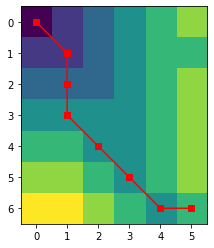

In [ ]:
plt.imshow(arr_dp)
plt.plot(path[:,1], path[:,0], '-rs')

Get all paths

In [ ]:
s1, s2 = 'school', 'fools'

In [ ]:
arr_path = [[[] for _ in range(len(s2)+1)] for _ in range(len(s1)+1)]
for i in range(1, len(s1)+1): arr_path[i][0].append(0)
for j in range(1, len(s2)+1): arr_path[0][j].append(0)

arr_dp   = np.zeros((len(s1)+1, len(s2)+1), dtype=np.int_)
arr_dp[:,0] = np.arange(len(s1)+1)
arr_dp[0,:] = np.arange(len(s2)+1)
for i in range(1, len(s1)+1):
    for j in range(1, len(s2)+1):
        c1 = arr_dp[i-1, j] + 1
        c2 = arr_dp[i, j-1] + 1
        c3 = arr_dp[i-1, j-1] + int(s1[i-1] != s2[j-1])
        arr_dp[i, j] = min(c1, c2, c3)
                
        if arr_dp[i, j] == c1: arr_path[i][j].append(0)
        if arr_dp[i, j] == c2: arr_path[i][j].append(1)
        if arr_dp[i, j] == c3: arr_path[i][j].append(2)

In [ ]:
arr_path

[[[], [0], [0], [0], [0], [0]],
 [[0], [2], [1, 2], [1, 2], [1, 2], [2]],
 [[0], [0, 2], [2], [1, 2], [1, 2], [0, 1, 2]],
 [[0], [0, 2], [0, 2], [2], [1, 2], [1, 2]],
 [[0], [0, 2], [2], [2], [1, 2], [1, 2]],
 [[0], [0, 2], [0, 2], [2], [1, 2], [1, 2]],
 [[0], [0, 2], [0], [0], [2], [1]]]

In [ ]:
def _print_paths(arr_path, i, j, path):
    
    if i == 0 and j == 0: 
        print(path)
        return
    
    for idx, d in enumerate(arr_path[i][j]):
        if   d == 0:
            path.append([i-1, j])
            _print_paths(arr_path, i-1, j,   path)
            path.pop()    
        elif d == 1: 
            path.append([i, j-1])
            _print_paths(arr_path, i,   j-1, path)
            path.pop()    
        elif d == 2: 
            path.append([i-1, j-1])
            _print_paths(arr_path, i-1, j-1, path)
            path.pop() 

In [ ]:
path = [[len(s1), len(s2)]]
_print_paths(arr_path, len(s1), len(s2), path)

[[6, 5], [6, 4], [5, 3], [4, 2], [3, 1], [2, 1], [1, 1], [0, 0]]
[[6, 5], [6, 4], [5, 3], [4, 2], [3, 1], [2, 1], [1, 0], [0, 0]]
[[6, 5], [6, 4], [5, 3], [4, 2], [3, 1], [2, 0], [1, 0], [0, 0]]


# Build

In [ ]:
build_notebook()

<IPython.core.display.Javascript object>

Converted module10.ipynb.
